### About Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

`kaggale link`

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
# Importing al libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("datasets/Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape

(8128, 13)

###### Analysing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

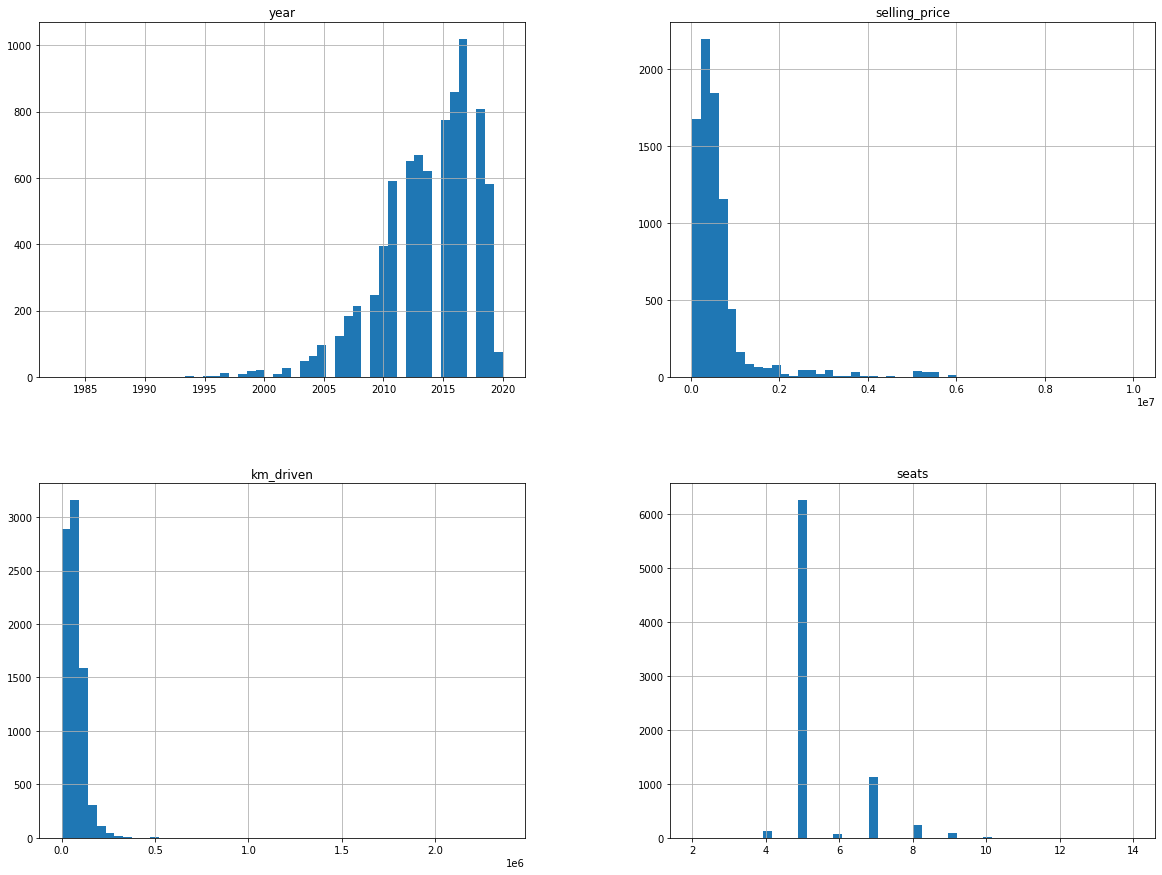

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
train_set,test_set = train_test_split(df,test_size=0.3,random_state=42)

In [9]:
train_set.shape

(5689, 13)

In [10]:
test_set.shape

(2439, 13)

### Discover & Visualize the Data to Gain Insights

First, we will put the test data aside and use training data solely for all data visualisation and data processing steps


In [11]:
# Creating a copy of training data for exploring
vehicles_train_copy = train_set.copy()
vehicles_train_copy.shape

(5689, 13)

In [12]:
vehicles_train_copy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6783,Maruti Alto LXi BSIII,2006,110000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
1073,Toyota Fortuner 2.8 2WD AT BSIV,2018,2940000,100000,Diesel,Dealer,Automatic,First Owner,12.9 kmpl,2755 CC,174.5 bhp,450Nm@ 1600-2400rpm,7.0
7756,BMW 3 Series 320d GT Luxury Line,2017,2950000,39000,Diesel,Dealer,Automatic,First Owner,19.59 kmpl,1995 CC,187.74 bhp,380Nm@ 1750-2750rpm,5.0
144,Toyota Corolla Altis 1.8 G CVT,2013,625000,39000,Petrol,Dealer,Automatic,First Owner,14.28 kmpl,1798 CC,138.03 bhp,173Nm@ 4000rpm,5.0
6424,Maruti Swift Dzire VDI,2013,395000,70000,Diesel,Individual,Manual,Second Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


<AxesSubplot:xlabel='transmission', ylabel='count'>

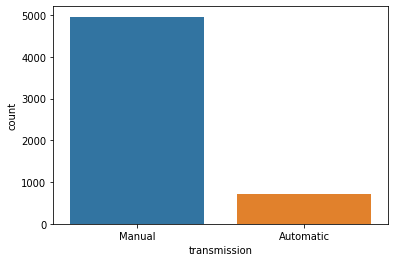

In [13]:
sns.countplot(vehicles_train_copy["transmission"])

From above graph we can conclude that we have more `Manual` transmissions cars with us.
The most probable reason for this is `Automatic` transmission are in-demand for recent years only

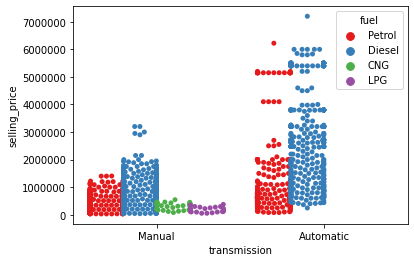

In [14]:
# Finding the relation between transmission and selling price on the basis of fuel
sns.swarmplot(x="transmission", y="selling_price", hue="fuel",data=vehicles_train_copy, palette="Set1", dodge=True)
plt.ticklabel_format(style='plain', axis='y')
# plt.ticklabel_format(style='plain', axis='x')
plt.show()


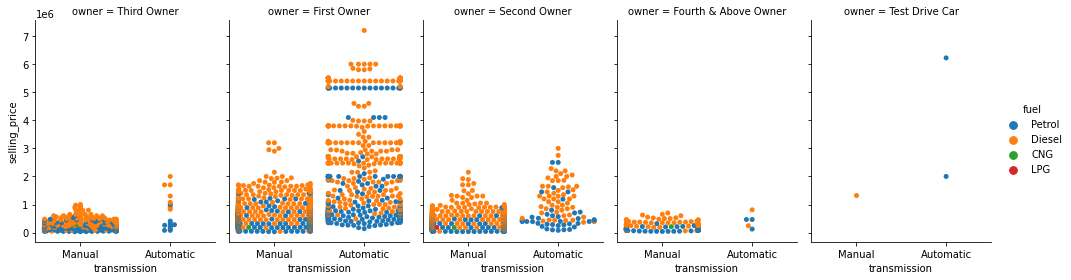

In [15]:
sns.catplot(x="transmission", y="selling_price",
                hue="fuel", col="owner",
                data=vehicles_train_copy, kind="swarm",
                height=4, aspect=.7)
plt.show()

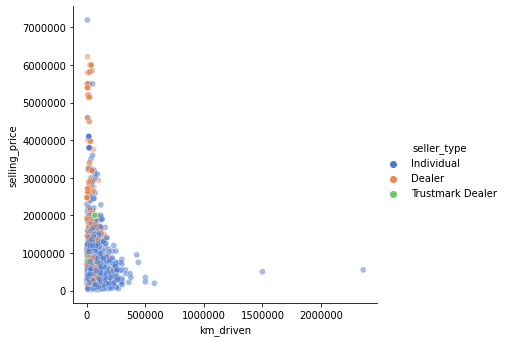

In [16]:
sns.relplot(x="km_driven", y="selling_price", hue="seller_type",alpha=.5, palette="muted",
            data=vehicles_train_copy)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

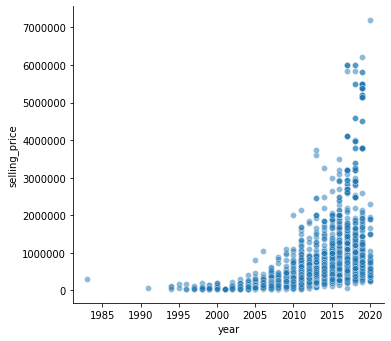

In [17]:
sns.relplot(x="year", y="selling_price",
            alpha=.5, 
            palette="muted",
            data=vehicles_train_copy)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

We need to change few dummy categorial features to numerical
- milage
- engine
- max power

    -> We also need to drop `name` and `torque` as they are adding any values to our prediction

In [18]:
vehicles_train_copy.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6783,Maruti Alto LXi BSIII,2006,110000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [19]:
def change_columns(df,**kwargs):
    for cols in kwargs:
        for values in kwargs[cols]:
            print(cols,values)
            df[cols] = df[cols].apply(lambda x: (str(x).strip(values)))
        df[cols] = df[cols].apply(lambda x:float(x))
            

change_columns(vehicles_train_copy,mileage=["kmpl","km/kg"],engine=["CC"])

mileage kmpl
mileage km/kg
engine CC


In [20]:
vehicles_train_copy.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6783,Maruti Alto LXi BSIII,2006,110000,120000,Petrol,Individual,Manual,Third Owner,19.7,796.0,46.3 bhp,62Nm@ 3000rpm,5.0


In [21]:
def change_max_power(sample):
    sample["max_power"] = sample["max_power"].apply(lambda x: float(x.strip("bhp").strip()) if str(x) != "nan" and str(x)!=' bhp' else np.nan)

In [22]:
change_max_power(vehicles_train_copy)

In [23]:
vehicles_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689 entries, 6783 to 7270
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5689 non-null   object 
 1   year           5689 non-null   int64  
 2   selling_price  5689 non-null   int64  
 3   km_driven      5689 non-null   int64  
 4   fuel           5689 non-null   object 
 5   seller_type    5689 non-null   object 
 6   transmission   5689 non-null   object 
 7   owner          5689 non-null   object 
 8   mileage        5538 non-null   float64
 9   engine         5538 non-null   float64
 10  max_power      5540 non-null   float64
 11  torque         5537 non-null   object 
 12  seats          5538 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 751.3+ KB


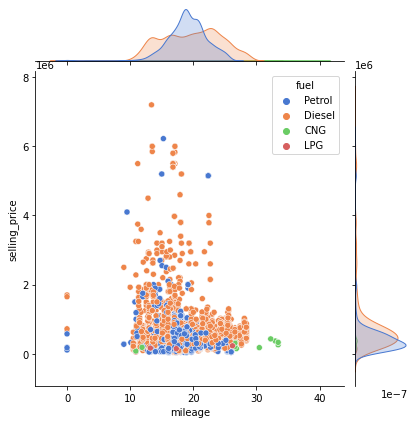

In [24]:
sns.jointplot(
    data=vehicles_train_copy,
    x="mileage", y="selling_price", hue="fuel",
    kind="scatter",
    palette="muted"
)


In [25]:
vehicles_train_copy.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.417795,-0.387508,0.329820,0.022966,0.236384,-0.000960
selling_price,0.417795,1.000000,-0.214012,-0.138174,0.454379,0.746911,0.041707
km_driven,-0.387508,-0.214012,1.000000,-0.164446,0.195776,-0.038114,0.211808
mileage,0.329820,-0.138174,-0.164446,1.000000,-0.576097,-0.380966,-0.434956
engine,0.022966,0.454379,0.195776,-0.576097,1.000000,0.698479,0.606721
max_power,0.236384,0.746911,-0.038114,-0.380966,0.698479,1.000000,0.189227
seats,-0.000960,0.041707,0.211808,-0.434956,0.606721,0.189227,1.000000


### Prepare the Data for Machine Learning Algorithms

### Data Cleaning

- Most machine learning algorithms cannot deal with missing features, so let's create a few functions to deal with them.
- Also we need to clean few dummy categorial features as processed before

In [26]:
#Dropping non-useful columns
train_set.drop(columns=["name","torque"],axis=1,inplace=True)
# Feature cleaning for dummy categorial features
change_columns(train_set,mileage=["kmpl","km/kg"],engine=["CC"])
change_max_power(train_set)


mileage kmpl
mileage km/kg
engine CC


In [27]:
train_set.shape

(5689, 11)

In [28]:
train_set.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          151
engine           151
max_power        149
seats            151
dtype: int64

In [29]:
#Simple imputer will work only on numerical data

nums_features = ["km_driven","mileage","engine","max_power","seats","year"] #"
cat_features = ["fuel","seller_type","transmission","owner"]

In [30]:
vehicles_train_nums = train_set[nums_features]
vehicles_train_nums.head()

,km_driven,mileage,engine,max_power,seats,year
6783,120000,19.70,796.0,46.30,5.0,2006
1073,100000,12.90,2755.0,174.50,7.0,2018
7756,39000,19.59,1995.0,187.74,5.0,2017
144,39000,14.28,1798.0,138.03,5.0,2013
6424,70000,23.40,1248.0,74.00,5.0,2013


In [31]:
vehicles_train_nums.isnull().sum()

km_driven      0
mileage      151
engine       151
max_power    149
seats        151
year           0
dtype: int64

In [32]:
vehicles_train_cat = train_set[cat_features]
vehicles_train_cat.head()

,fuel,seller_type,transmission,owner
6783,Petrol,Individual,Manual,Third Owner
1073,Diesel,Dealer,Automatic,First Owner
7756,Diesel,Dealer,Automatic,First Owner
144,Petrol,Dealer,Automatic,First Owner
6424,Diesel,Individual,Manual,Second Owner


In [33]:
vehicles_train_cat.isnull().sum()

fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

In [34]:
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

# vehicles_train_nums_tr = num_pipeline.fit_transform(vehicles_train_nums)

In [35]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, nums_features),
    ("cat", OneHotEncoder(), cat_features)
])



In [36]:
vehicles_transformed = full_pipeline.fit_transform(train_set)
vehicles_transformed.shape

(5689, 20)

In [37]:
vehicles_features = vehicles_transformed.drop("selling_price",axis=1)
vehicles_labels = vehicles_transformed["selling_price"]

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
vehicles_features.shape

That's it !! We have created our pipeline for data cleaning and processing our data
It has following steps :- 

- change_columns(vehicles_features,mileage=["kmpl","km/kg"],engine=["CC"])
- change_max_power(vehicles_features)
- full_pipeline.fit_transform(vehicles_features)

### Select and train our model

We are now ready to select & train an ML model.

First we will try with Linear Regression to predict our selling price.
For this purpose we will consider few part of training data so that we can keep our testing data intact

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X=vehicles_features,y=vehicles_labels)

In [ ]:
lin_reg.intercept_

In [ ]:
lin_reg.coef_

In [ ]:
some_test_data = train_set.iloc[:10]
# some_test_label = train_set.iloc[:10]


In [ ]:
some_test_data

In [ ]:
some_test_tr = full_pipeline.transform(some_test_data)
some_test_tr.shape

In [ ]:
some_test_features = some_test_tr.drop("selling_price",axis=1)
some_test_labels = some_test_tr["selling_price"]

In [ ]:
some_test_pred = lin_reg.predict(some_test_features)


In [ ]:
some_test_pred

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(some_test_label, some_test_pred)
rmse = np.sqrt(lin_mse)

In [ ]:
print(f'Mean squared error: {lin_mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

### Better Evaluation using Cross-Validation